In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.shape

(7043, 21)

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
yes_no_columns = [col for col in data.columns if data[col].nunique() == 2 and set(data[col].unique()) <= {'Yes', 'No'}]

for col in yes_no_columns:
    data[col] = data[col].map({'No': 0, 'Yes': 1})

In [10]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [11]:
data['TotalCharges'].values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [12]:
data.shape


(7043, 21)

In [13]:
print(yes_no_columns)

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [14]:
cols_to_clean = ['StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
                 'DeviceProtection', 'StreamingTV', 'MultipleLines']

for col in cols_to_clean:
    data[col] = data[col].replace({'No internet service': 'No'})
    data[col] = data[col].replace({'No phone service': 'No'})
    data[col] = data[col].map({'No': 0, 'Yes': 1})


In [15]:
def sum_count_null(data):
    for col in data.columns:
        print(f"{col} ===>  {data[col].isnull().sum()} ")

In [16]:
sum_count_null(data)

customerID ===>  0 
gender ===>  0 
SeniorCitizen ===>  0 
Partner ===>  0 
Dependents ===>  0 
tenure ===>  0 
PhoneService ===>  0 
MultipleLines ===>  0 
InternetService ===>  0 
OnlineSecurity ===>  0 
OnlineBackup ===>  0 
DeviceProtection ===>  0 
TechSupport ===>  0 
StreamingTV ===>  0 
StreamingMovies ===>  0 
Contract ===>  0 
PaperlessBilling ===>  0 
PaymentMethod ===>  0 
MonthlyCharges ===>  0 
TotalCharges ===>  11 
Churn ===>  0 


In [17]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [18]:
data=data.drop(columns  = 'customerID', axis=1)

In [19]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
data.shape

(7043, 20)

In [21]:
df = data.copy()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 
df = df.dropna(subset=['TotalCharges'])


In [22]:
df.shape

(7032, 20)

In [23]:
sum_count_null(df)

gender ===>  0 
SeniorCitizen ===>  0 
Partner ===>  0 
Dependents ===>  0 
tenure ===>  0 
PhoneService ===>  0 
MultipleLines ===>  0 
InternetService ===>  0 
OnlineSecurity ===>  0 
OnlineBackup ===>  0 
DeviceProtection ===>  0 
TechSupport ===>  0 
StreamingTV ===>  0 
StreamingMovies ===>  0 
Contract ===>  0 
PaperlessBilling ===>  0 
PaymentMethod ===>  0 
MonthlyCharges ===>  0 
TotalCharges ===>  0 
Churn ===>  0 


In [24]:
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1}).astype(int)

In [25]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [26]:
print(df.columns.tolist())


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [27]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [28]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [29]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [30]:
cols_to_encode = ['Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=cols_to_encode)


In [31]:
df['InternetService'] = df['InternetService'].map({
    'No': 0,
    'DSL': 1,
    'Fiber optic': 2
})


In [32]:
for col in df.columns :
    print(df[col].unique())

[1 0]
[0 1]
[1 0]
[0 1]
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
[0 1]
[0 1]
[1 2 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
[0 1]
[ True False]
[False  True]
[False  True]
[False  True]
[False  True]
[ True False]
[False  True]


In [33]:
tenure_churn_No = df[ df.Churn==0].tenure
tenure_churn_Yes = df[ df.Churn==1].tenure


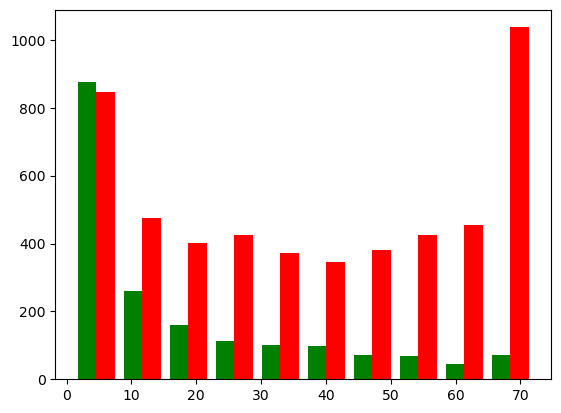

In [34]:
plt.hist([tenure_churn_Yes, tenure_churn_No], color = ['green','red'], label=['churn = Yes',' churn = No'])
plt.show()

In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,1,0,1,...,29.85,29.85,0,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,1,0,...,56.95,1889.50,0,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,1,...,53.85,108.15,1,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,1,0,...,42.30,1840.75,0,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,2,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False


In [36]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [37]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: [1 2 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtect

In [38]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn',axis='columns')
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)


In [39]:
df.shape

(7032, 25)

In [40]:
X_train.shape

(5625, 24)

In [41]:
X_test.shape

(1407, 24)

In [42]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,2,0,0,...,1,0.660199,0.097709,True,False,False,False,True,False,False
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0.011940,0.000075,True,False,False,False,False,True,False
2621,0,0,1,0,0.985915,1,0,1,0,1,...,1,0.605473,0.639978,False,False,True,False,True,False,False
392,1,1,0,0,0.014085,1,0,1,0,0,...,1,0.259204,0.008135,True,False,False,False,False,True,False
1327,0,0,1,0,0.816901,1,1,2,0,0,...,1,0.808458,0.685703,False,True,False,True,False,False,False
3607,1,0,0,0,0.169014,1,0,1,1,0,...,0,0.367164,0.083556,False,True,False,False,False,False,True
2773,0,0,1,0,0.323944,0,0,1,0,0,...,0,0.107960,0.077221,True,False,False,False,False,True,False
1936,1,0,1,0,0.704225,1,0,1,1,1,...,1,0.420398,0.360760,False,True,False,True,False,False,False
5387,0,0,0,0,0.042254,0,0,1,0,0,...,0,0.121891,0.011493,True,False,False,False,False,True,False
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0.072637,0.216859,False,False,True,True,False,False,False


In [43]:
len(X_train.columns)

24

In [44]:
pip uninstall tensorflow


^C
Note: you may need to restart the kernel to use updated packages.


In [45]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(24, input_shape=(24,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


c:\Users\chahb\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6707 - loss: 0.5734
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7901 - loss: 0.4331
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8105 - loss: 0.4024
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8044 - loss: 0.4222
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8067 - loss: 0.4093
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8086 - loss: 0.4110
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8152 - loss: 0.4091
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8123 - loss: 0.4059
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.4179
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8118 - loss: 0.4030
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8160 - loss: 0.3926
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [46]:
model.evaluate(X_test, y_test)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7871 - loss: 0.4824


[0.5014989376068115, 0.7697228193283081]

In [47]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.30545354],
       [0.54919744],
       [0.00990386],
       [0.8525555 ],
       [0.3437507 ]], dtype=float32)

In [48]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [49]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [53]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [54]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [55]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.91      0.85       999
           1       0.66      0.42      0.51       408

    accuracy                           0.77      1407
   macro avg       0.73      0.67      0.68      1407
weighted avg       0.76      0.77      0.75      1407



Text(95.72222222222221, 0.5, 'Truth')

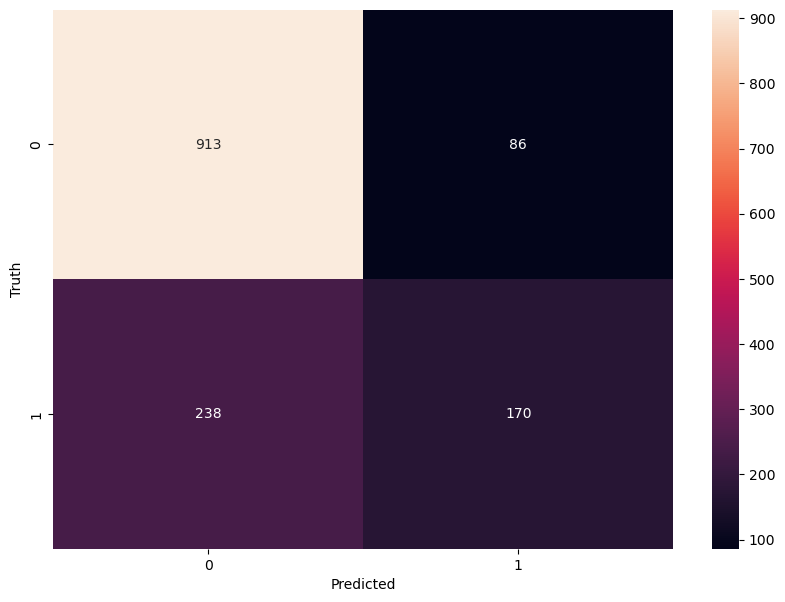

In [56]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [64]:
print("df[df['Churn'] == 1].count()[0] : ", df[df['Churn'] == 1].count()[0])
print("df[df['Churn'] == 0].count()[0] : ", df[df['Churn'] == 0].count()[0])

df[df['Churn'] == 1].count()[0] :  1869
df[df['Churn'] == 0].count()[0] :  5163
